In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest,probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Carga dos dados

In [2]:
df_pontuacao = pd.read_csv('pontuacao.csv')

In [3]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [5]:
df_pontuacao.tail()

,horas_estudo,pontuacao_teste
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


## EDA

In [6]:
# Medidas Estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

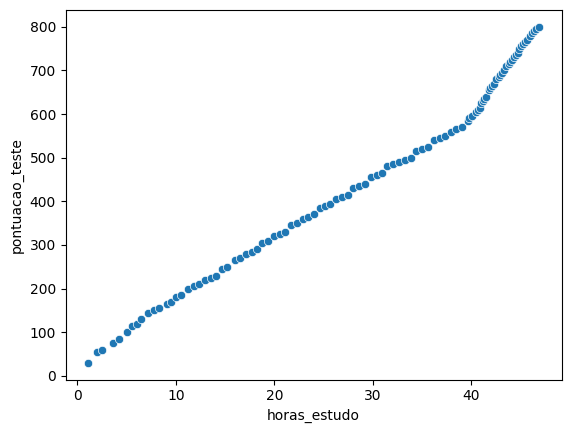

In [7]:
# Plot de dispersão
# X - Horas de Estudo
# y = pontuação do teste
sns.scatterplot(data = df_pontuacao, x = 'horas_estudo',y='pontuacao_teste')

C:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='horas_estudo'>

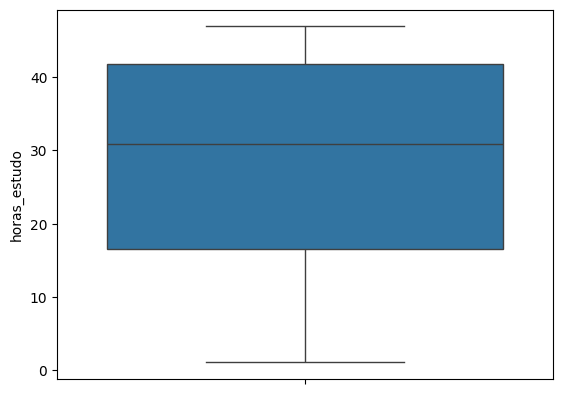

In [8]:
# Verificar se temos outliers
sns.boxplot(df_pontuacao, y = 'horas_estudo')

C:\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='pontuacao_teste'>

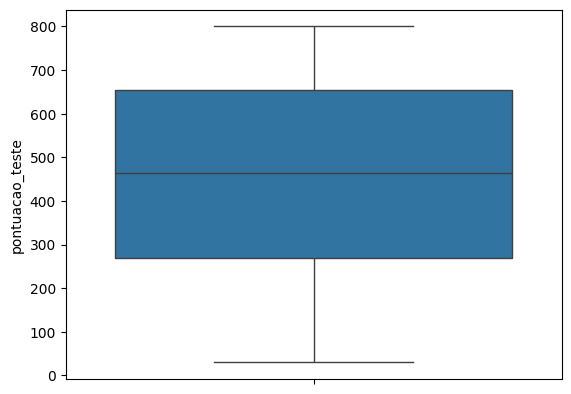

In [9]:
sns.boxplot(df_pontuacao, y = 'pontuacao_teste')

<Axes: >

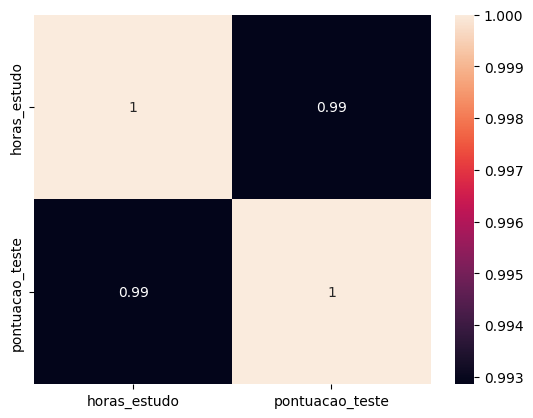

In [10]:
# Verificar Correlacao
sns.heatmap(df_pontuacao.corr('pearson'),annot = True)

<Axes: >

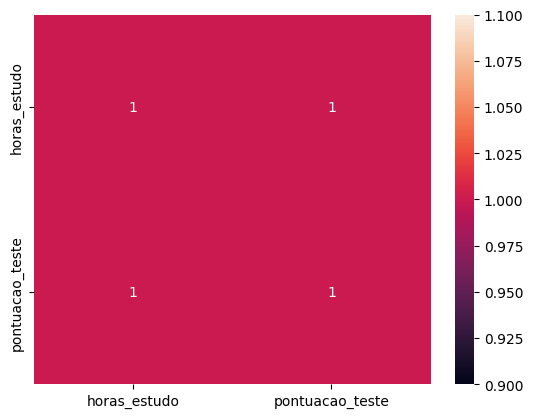

In [11]:
# Verificar Correlacao
sns.heatmap(df_pontuacao.corr('spearman'),annot = True)

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


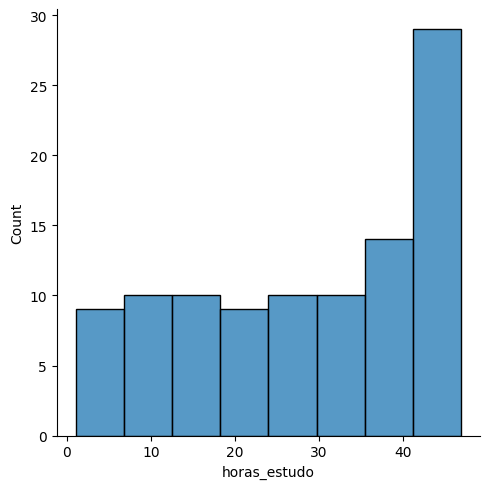

In [12]:
sns.displot(df_pontuacao, x = 'horas_estudo')

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


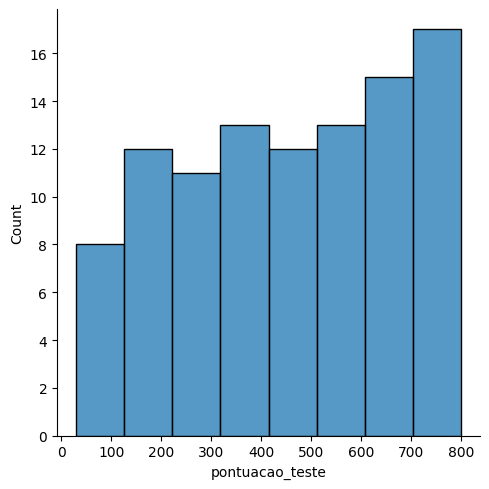

In [13]:
sns.displot(df_pontuacao, x = 'pontuacao_teste')

## Treinar Modelo

In [14]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=50)

In [15]:
reg_model = LinearRegression()

In [16]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f"y = {reg_model.coef_[0][0]} x + {reg_model. intercept_[0]}")

y = 15.642618538778748 x + 8.476600783894582


### Validar Modelo - Métricas

In [18]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [19]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# R² representa a proporção na variável na variável dependente que é explicado pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test,y_pred)

0.9828400452912442

In [20]:
# Calcular o MAE - Mean Absolute Error
# MAE - Media (y_test - y_pred)
# É uma métrica fácil de interpretar
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

22.957470277134615

In [21]:
# Calcular MSE - Mean Squared Error
# MSE = Media(y_test - y_pred)²
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliets e penaliza grande erros
mean_squared_error(y_test, y_pred)

766.9972992416427

In [22]:
# Calcular RMSE - Root Mean Squared Error
# MSE = Raiz Media(y_test - y_pred)²
# É uma métrica fácil de interpretar
mean_squared_error(y_test, y_pred, squared = False)

27.69471608884342

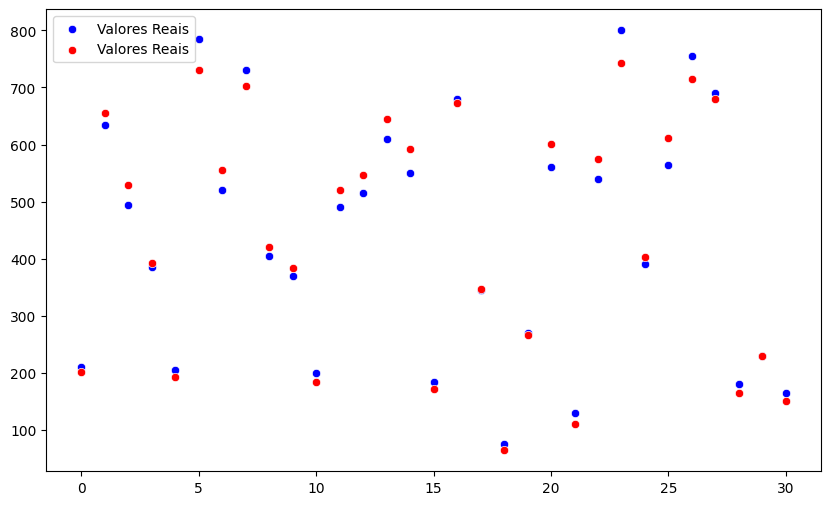

In [23]:
x_axis = range(len(y_test))
plt.figure(figsize = (10,6))
sns.scatterplot(x = x_axis, y = y_test.reshape(-1), color = 'blue',label = 'Valores Reais')
sns.scatterplot(x = x_axis, y = y_pred.reshape(-1), color = 'red',label = 'Valores Reais')
plt.legend()
plt.show()

### Análise de Resíduos

In [24]:
#Calcular os resíduos
residuos = y_test - y_pred

In [25]:
# Calcular os resíduos padronizados - Standardization
# Para cada elemento de um conjunto (x - mean)/ std
from scipy.stats import zscore
residuos_std = zscore(residuos)

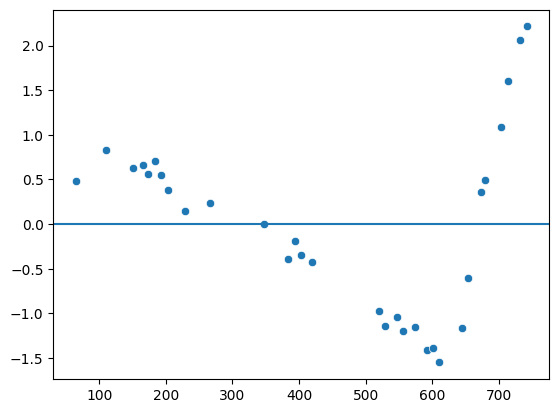

In [26]:
# Verificar linearidade do modelo
# Se os resíduos estiverem entre -2 e +2 (na escala padrão), o modelo é linear
# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores em torno da reta - Homoscedasticidade
# Se tivermos alguma tendência ou padrão (cone/funil), há heterocedasticidade

sns.scatterplot(x = y_pred.reshape(-1), y = residuos_std.reshape(-1))
plt.axhline(y=0)

- Não Linear & Heterocedasticidade

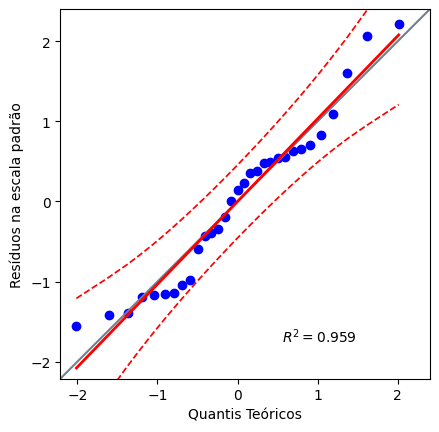

In [27]:
# Checar se os resíduos seguem uma distribuição Normal
# QQ - Quantile-Quantile plot, que avalia se a amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist ='norm', confidence = 0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [30]:
#Teste de Normalidade - Shapiro Wilk
# H0: Resíduos seguem distribuição Normal -> p >= 0.05
stat_shapiro , p_valor_shapiro = shapiro(residuos.reshape(-1))
print(f"Estatística do Teste: {stat_shapiro} e P-Valor {p_valor_shapiro}")

Estatística do Teste: 0.9500530362129211 e P-Valor 0.15663613379001617


In [31]:
#Teste de Normalidade - Kolmogorov-Smirnov
# H0: Resíduos seguem distribuição Normal -> p >= 0.05
stat_ks , p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print(f"Estatística do Teste: {stat_ks} e P-Valor {p_valor_ks}")

Estatística do Teste: 0.48355808450512827 e P-Valor 3.395368995814077e-07


- Por Kolmogorov-Smirnov, rejeitamos a normalidade da distribuição dos resíduos

### Fazer Predições com o modelo

In [34]:
# Se eu estudar 30,4 h, qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])


array([[484.01220436]])

In [35]:
# Quantas horas estudar para obter 600 pontos
# y = ax + b  -> x = (y-b)/a
(600 - reg_model.intercept_[0])/reg_model.coef_[0][0]

37.81485802710669

### Salvar modelo para usar depois

In [36]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']